# Can Age and Experience predict the number of hours played in the Players dataset?

Vanessa Mah 76858182 - Group 22

## (1) Data Description

To start, install and load the necessary packages for data manipulation.

In [1]:
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Although two datasets are provided, only the dataset from the `players.csv` file will be used for this project because the main question to be solved requires only data from `players.csv`. The file can be loaded into R using the `read.csv()` function.

In [2]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100_individual_project/refs/heads/main/players.csv"
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


### Datset Overview

The `players` dataset provides insights into a group of players, including their experience level, subscription status, hours played, names, gender, and age. 

Number of Observations: 196 

Number of Variables: 7 


#### Variable Information

| Variable     | Type      | Example Values                   | Meaning                                      |
|--------------|-----------|----------------------------------|----------------------------------------------|
| `experience`   | Character | Amateur, Pro | Player’s skill or experience level           |
| `subscribe`    | Logical   | TRUE / FALSE                    | Whether player has an active subscription    |
| `hashedEmail`  | Character | f8fda41...                     | Unique anonymized player identifier          |
| `played_hours` | Numeric   | 0.0, 30.3, 48.4                 | Total hours played                           |
| `name`         | Character | Morgan, Christian                   | Player’s given name                          |
| `gender`       | Character | Male, Female, Non-binary | Player’s self-reported gender                |
| `Age`          | Numeric   | 9, 21, 58                      | Age of the player in years                                 |


#### Potential Issues in the Data
There are several potential issues that need to be addressed for more accurate analysis:

- **Missing values**: The `Age` variable contains missing values for one player. There is also a possibility that other variables may contain missing values that are not visible.
- **Outliers**: The `played_hours` variable has extreme values (eg. 48.4 hours for one player), while many others report very low playtime. These outliers could skew summary statistics, especially the mean.
- **Imbalanced categories**: The `gender` variable contains diverse categories, but some (eg. Two-Spirited) may be underrepresented.
- **Experience variable**: The `experience` variable should be converted to a factor, as it represents categorical data (eg. "Amateur", "Pro") and is currently stored as a character

#### How the Data Were Collected
The dataset was collected from the PLAIcraft server through both self-reported information and automated tracking.

**Player-Provided Information:**
- `experience`, `name`, `gender`, and `Age`: Provided by players during account creation or profile updates.
- `hashedEmail`: Player email address collected during account registration, then anonymized for privacy.
- `subscribe`: Collected based on the player's selection of an active subscription during account creation or afterward.

**Automated Tracking:**
- `played_hours`: Automatically tracked by the server based on in-game activity.

In [3]:
SUMMARY

ERROR: Error in eval(expr, envir, enclos): object 'SUMMARY' not found


## (2) Question

The broad question to be answered is: **Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts?**

To refine this question, the specific question is: **Can Age and Experience predict hours played in the Players dataset?**

The data will help address the question of interest by providing insights into how age and experience might influence the hours played by players on the PLAIcraft server. By analyzing these variables, patterns can be identified that reveal whether certain age groups or experience levels are associated with higher player engagement. This information is valuable for targeting the most engaged players in recruitment efforts.

Since this question is specific to the `players` dataset, the `sessions` dataset will not be used in the analysis. Only variables from the `players` dataset, such as `Age`, `experience`, and `played_hours`, will be considered to address the question of predicting player engagement.

To perform minimum wrangling on the `players` dataset for predictive modeling, we can:
1. **Select relevant columns**: Only include the variables `Age`, `experience`, and `played_hours`, which are necessary for the analysis.<br><br>

2. **Convert data types**: Ensure the data is in an appropriate format for modeling:
   - Convert `Age` to an integer to ensure it's represented as a whole number.
   - Convert `experience` to a factor to treat it as a categorical variable.<br><br>

3. **Save the wrangled data**: Save the tidy dataset to a new object called `players_tidy` to use in modeling.

**Note**: 
- THE VARIABLES ARE TIDY CUZ COLUMNS ARE The `Age` variable contains one missing value, but it will be ignored in the analysis since it does not significantly affect the overall modeling process. T

## (3) Exploratory Data Analysis and Visualization

First, load the dataset by referencing the saved object, `players`, to access it for analysis.

In [ ]:
players

Next, perform minimum wrangling on the dataset to turn it into tidy format.

In [7]:
players_tidy <- players |>
  select (Age, experience, played_hours) |>
  mutate(
    Age = as.integer(Age),
    experience = as_factor(experience))

head(players_tidy)

Age,experience,played_hours
<int>,<fct>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
21,Amateur,0.7
21,Regular,0.1
17,Amateur,0.0


Computation of the mean value for each quantitative variable in the dataset can be reported. We also need to remember to take into consideration missing values by using the `na.rm = TRUE` argument to exclude them from the calculations.


In [8]:
mean_values <- players_tidy |>
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE))
mean_values


mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


We can now make a few exploratory visualizations of the data.

A visualization of Age and Hours Played:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


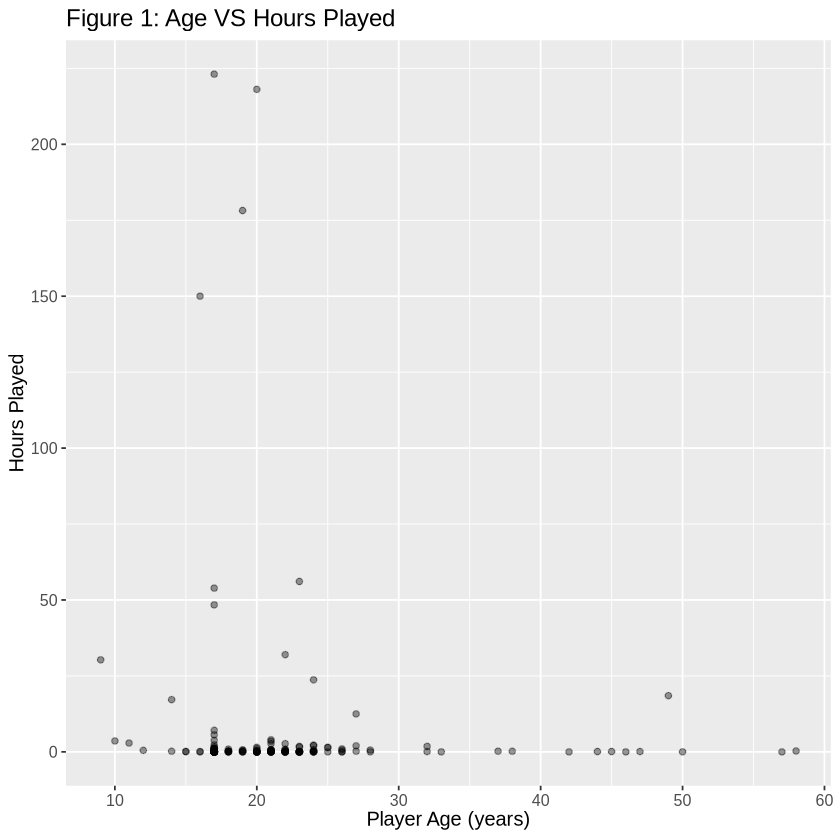

In [9]:

players_age <- ggplot(players, aes(x = Age, y = played_hours)) +
 geom_point(alpha = 0.4) +
 xlab("Player Age (years)") +
 ylab("Hours Played") +
 ggtitle("Figure 1: Age VS Hours Played")+
  theme(text = element_text(size = 12))
players_age

Figure 1 shows that most players are between the ages of 10 and 30, with the majority logging fewer than 10 hours of playtime. The 16-20 age range includes several outliers who have played over 150 hours. Beyond age 30, both the number of players and their hours played decline.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


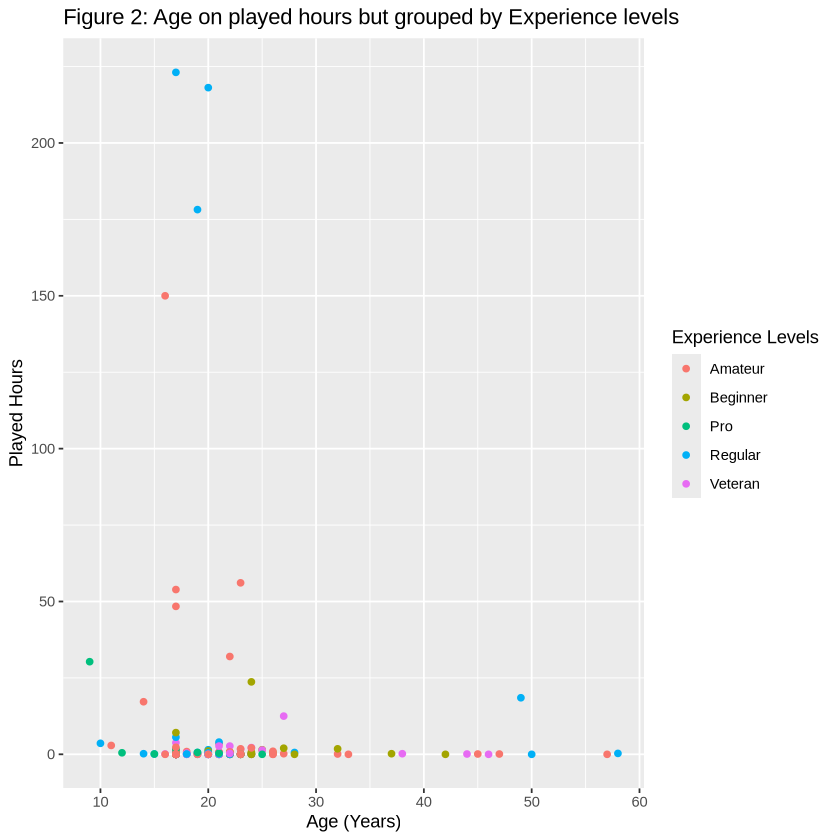

In [10]:
players_age_1 <- players |>
  ggplot(aes(x=Age, y=played_hours, color=experience)) +
  geom_point() +
  labs(title = "Figure 2: Age on played hours but grouped by Experience levels",
        color = "Experience Levels",
        x = "Age (Years)",
        y = "Played Hours" )
players_age_1

Figure 2 is similar to Figure 1, but with colour coding the data points according to the experience level of the players. This helps understand which experience levels are contributing to the hours played at each age range. From this plot, the Regular level players dominate the higher hours played, with the Amateur players following. 

Bar graph to provide a better visualization in the distribution of experience levels

experience,avg_played_hrs,total_hours
<fct>,<dbl>,<dbl>
Pro,2.6000000,36.4
Veteran,0.6479167,31.1
Amateur,6.0174603,379.1
Regular,18.2083333,655.5
Beginner,1.2485714,43.7


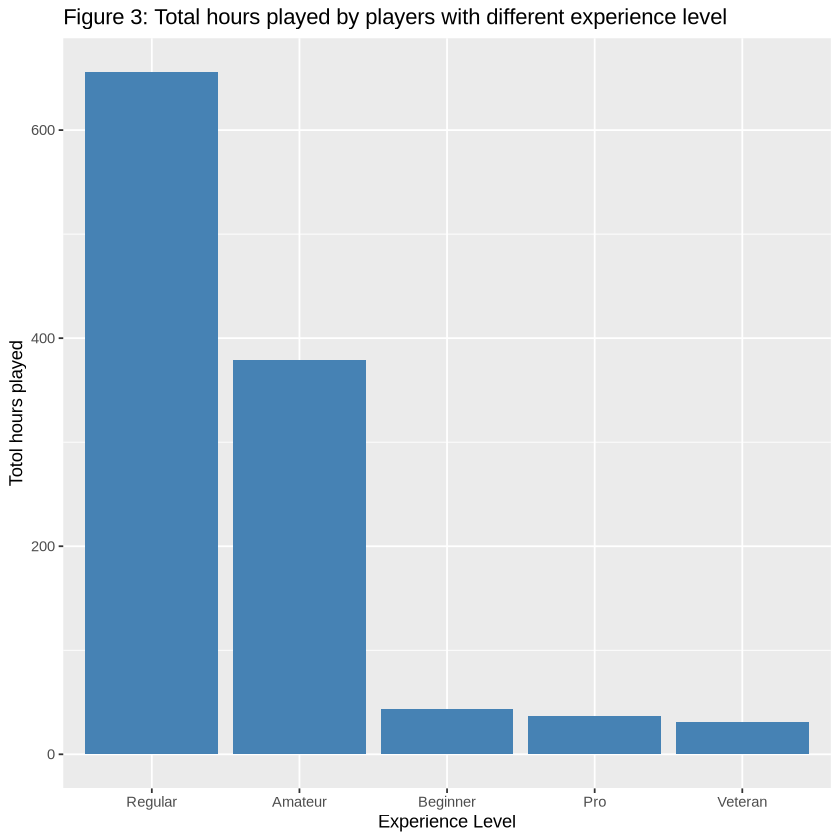

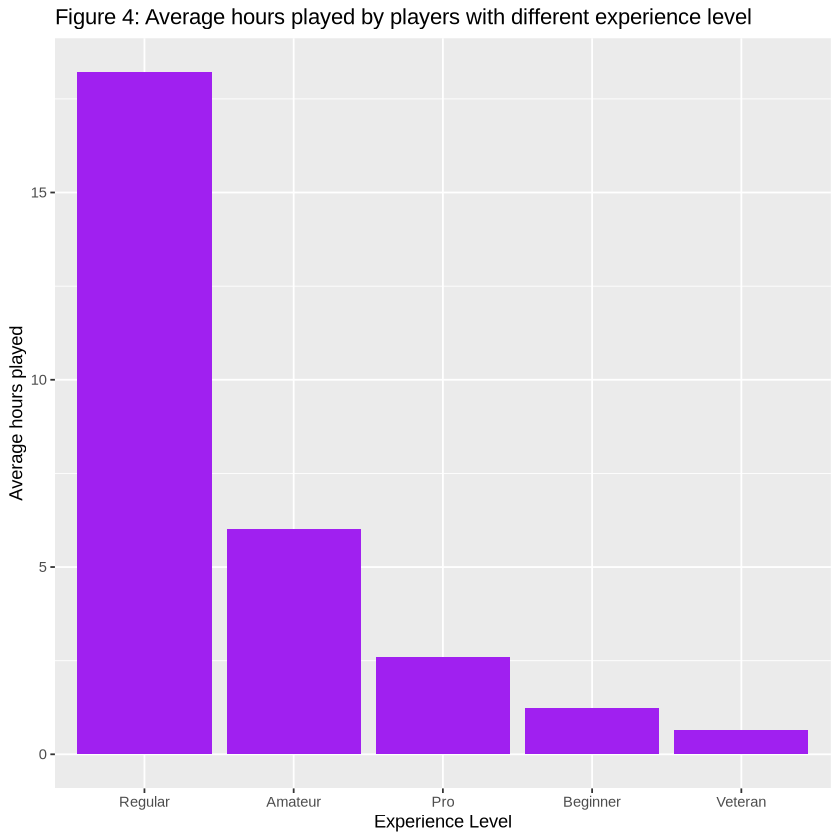

In [11]:
experience_played_hours_summarize <- players_tidy |>
            select(experience, played_hours) |>
            group_by(experience) |>
            summarize(avg_played_hrs = mean (played_hours, na.rm = TRUE),
                      total_hours = sum(played_hours, na.rm = TRUE))|>
            mutate(experience = fct_reorder(experience, total_hours, .desc = TRUE))
experience_played_hours_summarize

played_hours_experience <- experience_played_hours_summarize |>
          ggplot(aes(x = experience, y = total_hours)) +
          geom_bar(stat="identity", fill = "steelblue") +
          labs(title = "Figure 3: Total hours played by players with different experience level",
               x = "Experience Level",
               y = "Totol hours played" )

played_hours_experience

players_average_experience <- experience_played_hours_summarize |>
  mutate(experience = fct_reorder(experience, avg_played_hrs, .desc = TRUE))

avg_played_hours_experience <- players_average_experience |>
          ggplot(aes(x = experience, y = avg_played_hrs)) +
          geom_bar(stat="identity", fill = "purple") +
          labs(title = "Figure 4: Average hours played by players with different experience level",
               x = "Experience Level",
               y = "Average hours played" )

avg_played_hours_experience


Figure 3 shows that Regular players have the highest total hours played, with Amateur players being the second most engaged group. Beginners, Pros, and Veterans all show similarly low total hours. This suggests that high playtime is not necessarily associated with advanced experience levels.

Figure 4 shows that Regular players have the highest average hours played, while all other experience levels are much lower. This pattern suggests that Regular players are the most consistently engaged group, regardless of experience level.

## (4) Methods and Plan

To address whether Age and Experience can predict hours played, the **K-Nearest Neighbors** methods were used, tailored to each variable. **KNN regression** can be used to explore the relationship between age and hours played as a continuous variable, and **KNN classification** can be used to examine how experience relates to categorized hours played. These approaches are chosen over linear regression because the dataset contains many outliers (see Figures 1 and 2), which can distort linear models. Linear regression assumes a continuous output and a fixed linear trend, which doesn't suit classification tasks. In contrast, KNN relies on local comparisons and adapts to the structure of the data, making it more flexible for both regression and classification in this scenario. 

To apply KNN, it is assumed that the input variables used are scaled appropriately due to reliance on distance calculations and that the value of K is chosen carefully. KNN methods can also be limited by sensitivity to unscaled inputs and the chosen value of K, and poor performance with sparse data. Additionally selecting an optimal value of K is essential.

To compare and select the models, the number of neighbors K will be tuned using cross-validation to optimize performance. For the age vs. hours played analysis, KNN regression will be compared to linear regression by calculating RMSPE values; a lower RMSPE will indicate better predictive accuracy and justify the use of KNN. For the experience vs. categorized hours played analysis, KNN classification will be used, as the target variable is categorical and not suitable for regression-based approaches.

To apply the KNN model, using the `players_tidy` dataset, the data will be split into training and testing sets (75/25), stratified by played_hours. A recipe will standardize `Age`, and a KNN regression model with rectangular weighting will be tuned over a grid of neighbor values (1–110) using 5-fold cross-validation. The best *K* will be selected based on RMSPE, retrained on the full training set, and evaluated on the test set; results will be compared to a linear regression model using the same preprocessing.




